# Практика 3

## Статистика на Python

### 1. Загрузить данные из файла “insurance.csv”

In [2]:
import pandas as pd


data = pd.read_csv("C:\\Users\\grman\\Documents\\BigPapa\\Greg\\BigData\\DataSet\\pr3\\insurance.csv")

### 2. С помощью метода describe() посмотреть статистику по данным. Сделать выводы.

In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Видно, что:**
- **Непустых значений в каждом из столбцов одинаковое количество - 1338**
- **Средний возраст - 39.2, возраст людей находится в диапазоне от 18 до 64 лет (минимальный возраст - 18, максимальный - 64).**
- **Средний индекс массы тела (bmi) - 30.7, ИМТ людей в значениях от 16 до 53.1.**
- **Количество детей находится в диапазоне от 0 до 5, в среднем - 1.1.**
- **В страховых выплатах среднее значение - 13270.4. Максимальное - 63к, минимальное - 1к. Максимальное значение сильно больше среднего значения.**

### 3. Построить гистограммы для числовых показателей. Сделать выводы.

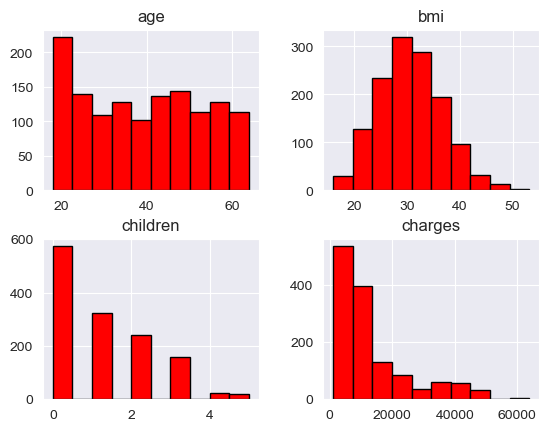

In [4]:
#используя pandas:
import matplotlib.pyplot as plt


data.hist(color='red', edgecolor='black') #гистограмма (график распределения) из pandas
plt.show()


**У всего датафрейма 7 столбцов, 3 из которых нас не интересуют: 'sex', 'smoker' и 'region', так как не относятся к числовым**

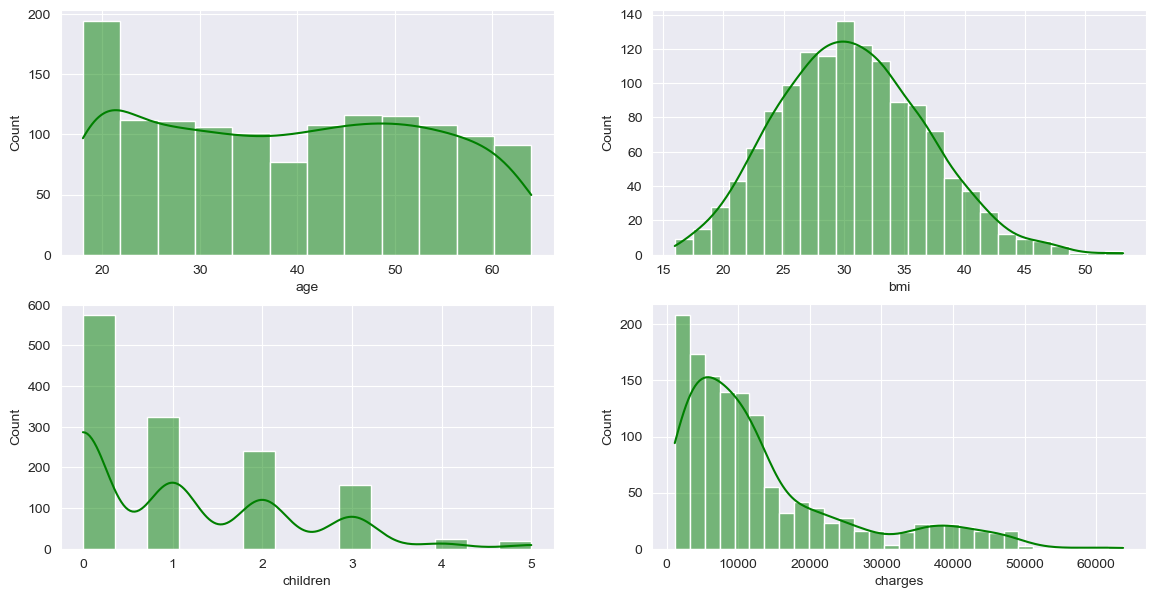

In [5]:
#теперь построим гистограммы, используя библиотеку seaborn:
import seaborn as sns


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 7))

for i, j in enumerate(data.drop(['sex', 'smoker', 'region'], axis=1).columns):
    sns.histplot(data[j], kde=True, ax=axs[i//2, i%2], color='green') #так как axs - двумерный массив, то необходимо правильно найти индекс.


**Из построенных гистограмм видно, что:**
- **В колонке 'age' значение 20 встречается чаще других**
- **В колонке 'children' довольно мало значений 4 и 5**
- **В колонке 'charges' в основном встречаются значения до 15,000**
- **В колонке 'bmi' хорошее распределение значений**

### 4. Найти меры центральной тенденции и меры разброса для индекса массы тела (bmi) и расходов (charges). 
- ### Отобразить результаты в виде текста и на гистограммах (3 вертикальные линии). 
- ### Добавить легенду на графики. 
- ### Сделать выводы.

**Меры центральной тенденции:**

In [6]:
import numpy as np
import scipy.stats as sts


#для bmi:
moda_bmi = sts.mode(data['bmi'], keepdims=False)
mean_bmi = np.mean(data['bmi'])
med_bmi = np.median(data['bmi'])
print(f"Для bmi:\nМода: {moda_bmi}\nСреднее значение: {round(mean_bmi, 2)}\nМедиана: {med_bmi}", end='\n\n')

#для charges:
moda_charges = sts.mode(data['charges'], keepdims=False)
mean_charges = np.mean(data['charges'])
med_charges = np.median(data['charges'])
print(f"Для charges:\nМода: {moda_charges}\nСреднее значение: {round(mean_charges, 2)}\nМедиана: {med_charges}")


Для bmi:
Мода: ModeResult(mode=32.3, count=13)
Среднее значение: 30.66
Медиана: 30.4

Для charges:
Мода: ModeResult(mode=1639.5631, count=2)
Среднее значение: 13270.42
Медиана: 9382.033


**Меры разброса (изменчивости):**

In [7]:
razmah_bmi = data['bmi'].max() - data['bmi'].min() #размах
std_bmi = data['bmi'].std() #стандартное отклонение
iqr_bmi = sts.iqr(data['bmi'], interpolation='midpoint') #межквартильный размах (IQR)
print(f"Для bmi:\nРазмах: {razmah_bmi}\nСтандартное отклонение: {round(std_bmi, 2)}\nМежквартильный размах: {round(iqr_bmi, 2)}", end='\n\n')

razmah_charges = data['charges'].max() - data['charges'].min()
std_charges = data['charges'].std()
iqr_charges = sts.iqr(data['charges'], interpolation='midpoint')
print(f"Для charges:\nРазмах: {round(razmah_charges, 2)}\nСтандартное отклонение: {round(std_charges, 2)}\nМежквартильный размах: {round(iqr_charges, 2)}", end='\n\n')


Для bmi:
Размах: 37.17
Стандартное отклонение: 6.1
Межквартильный размах: 8.38

Для charges:
Размах: 62648.55
Стандартное отклонение: 12110.01
Межквартильный размах: 11879.8


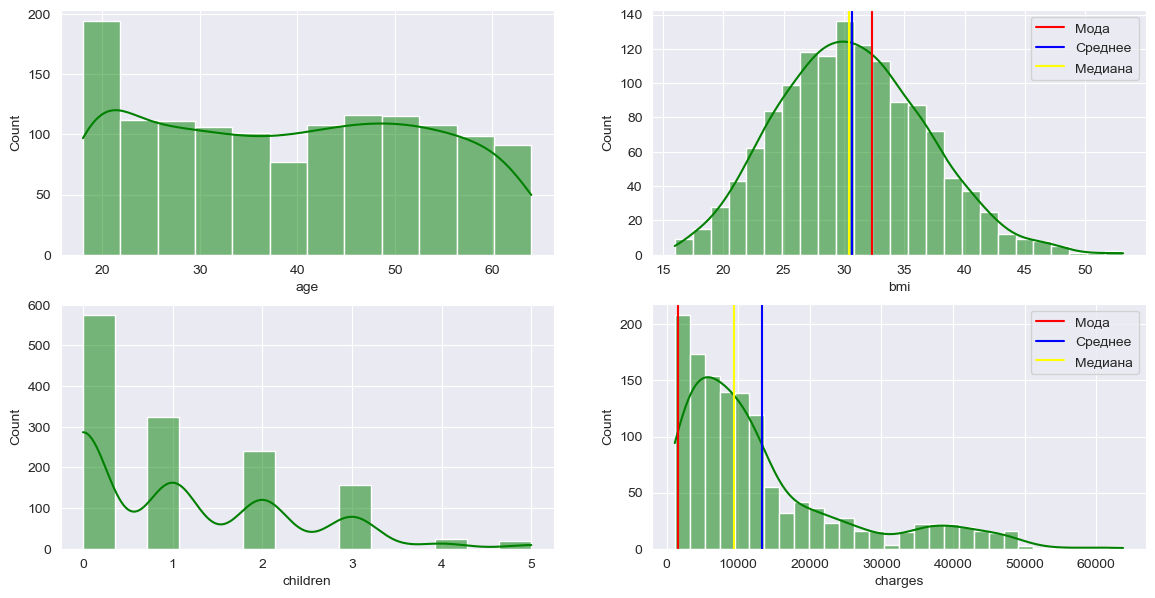

In [8]:
#теперь построим гистограммы, используя библиотеку seaborn:


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 7))

for i, j in enumerate(data.drop(['sex', 'smoker', 'region'], axis=1).columns):
    sns.histplot(data[j], kde=True, ax=axs[i//2, i%2], color='green') #так как axs - двумерный массив, то необходимо правильно найти индекс.

m_c_t = ['Мода', 'Среднее', 'Медиана']
colors = ['red', 'blue', 'yellow']
s = 0
for k in [moda_bmi[0], mean_bmi, med_bmi]:
    axs[0, 1].axvline(x=k, color=colors[s], label=f'{m_c_t[s]}')
    s += 1
    axs[0, 1].legend()

s = 0
for k in [moda_charges[0], mean_charges, med_charges]:
    axs[1, 1].axvline(x=k, color=colors[s], label=f'{m_c_t[s]}')
    s += 1
    axs[1, 1].legend()
    

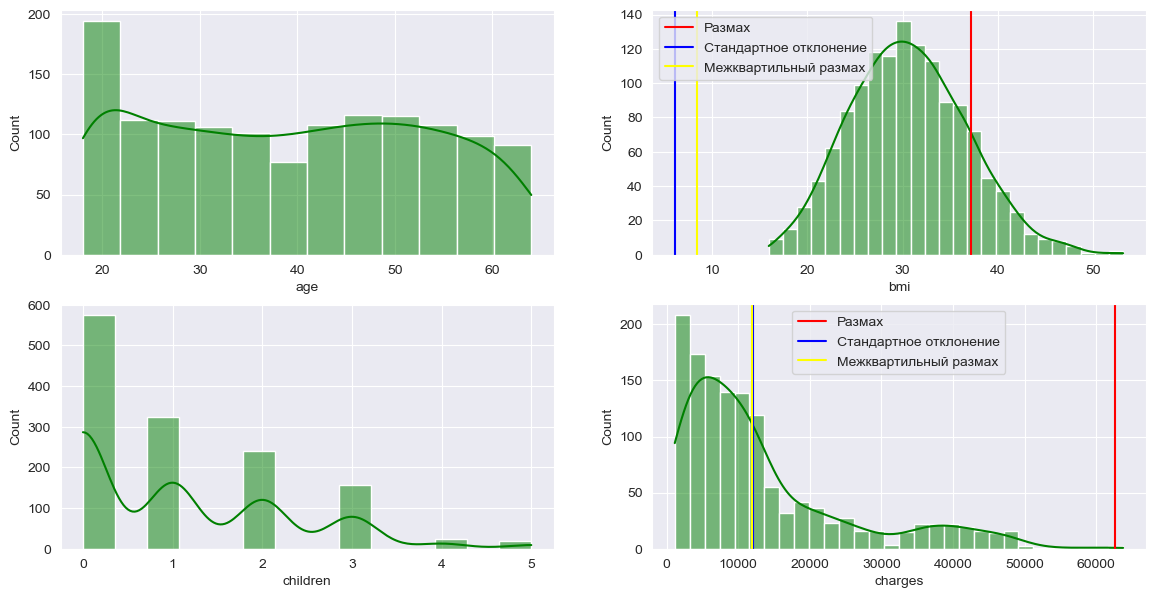

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 7))

for i, j in enumerate(data.drop(['sex', 'smoker', 'region'], axis=1).columns):
    sns.histplot(data[j], kde=True, ax=axs[i//2, i%2], color='green') #так как axs - двумерный массив, то необходимо правильно найти индекс.

m_c_i = ['Размах', 'Стандартное отклонение', 'Межквартильный размах']
colors = ['red', 'blue', 'yellow']
s = 0
for k in [razmah_bmi, std_bmi, iqr_bmi]:
    axs[0, 1].axvline(x=k, color=colors[s], label=f'{m_c_i[s]}')
    s += 1
    axs[0, 1].legend()

s = 0
for k in [razmah_charges, std_charges, iqr_charges]:
    axs[1, 1].axvline(x=k, color=colors[s], label=f'{m_c_i[s]}')
    s += 1
    axs[1, 1].legend()
    

**На графиках видно, что:**
- **Меры центральной тенденции для столбца bmi находятся примерно в одном значении, что нельзя сказать про charges**
- **Размах (разница между максимальным значением и минимальным) для bmi и charges сильно разнится с стандартным отклонением и межквартильным размахом. Для bmi стандартное отклонение отличается от межквартильного размаха сильнее, чем это происходит у столбца charges**

### 5. Построить box-plot для числовых показателей. Названия графиков должны соответствовать названиям признаков. Сделать выводы.

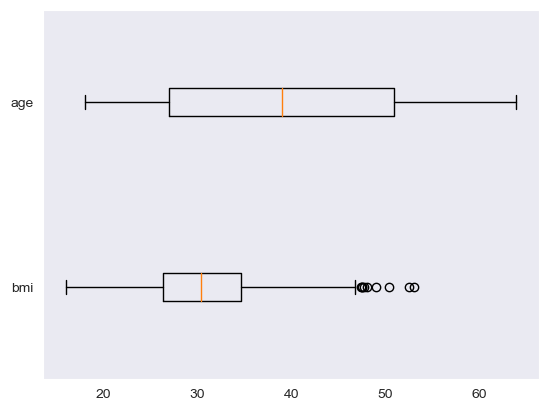

In [10]:
plt.figure()
plt.boxplot([data['bmi'], data['age']], labels=['bmi', 'age'], vert=False)
plt.grid()
plt.show()

**Среди значений в столбце с возрастом нет выбросов, в отличие от столбца с индексом массы тела. Графики показывают медиану (оранжевая вертикальная линия посередине коробки), внутри коробки 50% значений каждого из столбцов, на усах - остальные 50% значений (за исключением выбросов, они находятся за пределами усов)**

### 6. Используя признак charges или bmi, проверить, выполняется ли центральная предельная теорема. Использовать различные длины выборок n. Количество выборок = 300. Вывести результат в виде гистограмм. Найти стандартное отклонение и среднее для полученных распределений. Сделать выводы.

**Нужно взять разные размеры выборок (так как записей всего 1338, то возьмем 10, 100, 250, 900) и будем 300 раз для каждого размера выборок проверять, выполняется ли центральная предельная теорема**

Распределение при длине выборки = 10: ст. отклонение = 1.93, среднее = 30.86
Распределение при длине выборки = 100: ст. отклонение = 0.6, среднее = 30.63
Распределение при длине выборки = 250: ст. отклонение = 0.34, среднее = 30.66
Распределение при длине выборки = 900: ст. отклонение = 0.12, среднее = 30.66


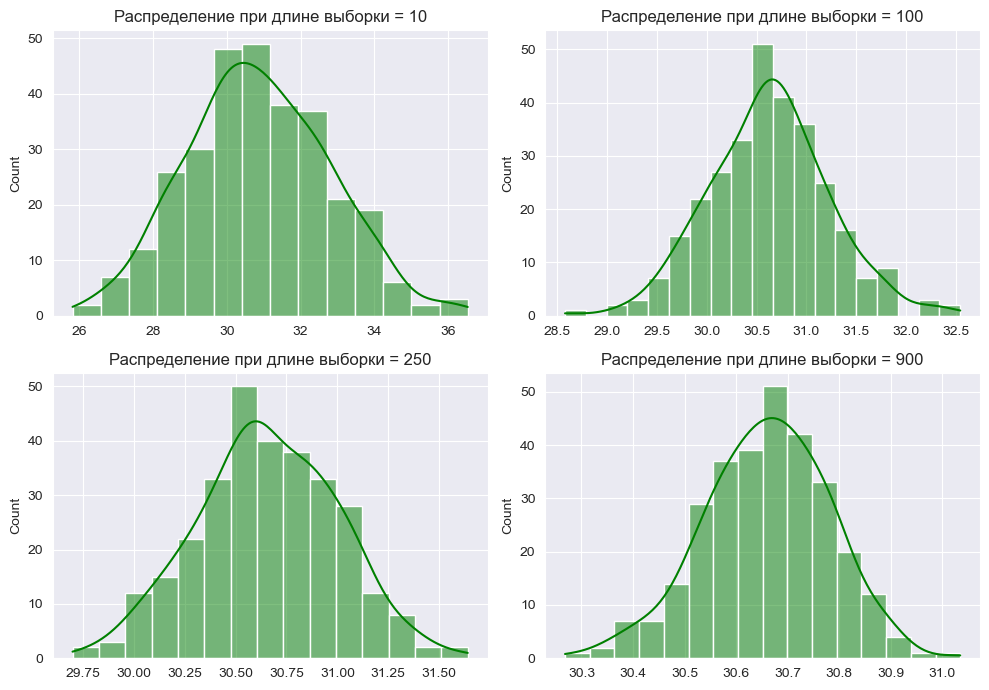

In [11]:
n = (10, 100, 250, 900) #длины выборок (сколько значений из генеральной совокупности берем)

plt.figure(figsize=(10, 7))
for i in range(len(n)):
    means = []
    for j in range(1, 301):
        selection = data['bmi'].sample(n[i]) #выборка (определенной длины)
        mean_selection = selection.mean() #берем среднее значение для этой выборки
        means.append(mean_selection) #добавляем в список это среднее, чтобы отразить распределение этих средних выборки определенной длины на гистограмме
    plt.subplot(2, 2, i + 1)
    sns.histplot(means, kde=True, color = 'green')
    plt.title(f'Распределение при длине выборки = {n[i]}')
    plt.tight_layout() #расстояние между графиками
    print(f'Распределение при длине выборки = {n[i]}: ст. отклонение = {round(np.std(means), 2)}, среднее = {round(np.mean(means), 2)}')
    

**Была проверена центральная предельная теорема: среднее значение при каждом распределении выборочных средних разных длин при увеличнеии длины выборки начинает стремиться к среднему значению глобальной совокупности. Также можно заметить, что при увеличении длин выборок, стандартное отклонение начинает стремиться к нулевому значению, что опять же подтверждает центральную предельную теорему.**

### 7. Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела.

**Для расчета доверительного интервала нужно множество раз извлечь из генеральной совокупности выборки длины n и затем для каждой выборки рассчитать среднее значение и свой доверительный интервал.**

**95% доверительный интервал:**
- **Для нижней границы: x - 1.96 SE**
- **Для верхней границы: x + 1.96 SE**

**99% доверительный интервал:**
- **Для нижней границы: x - 2.58 SE**
- **Для верхней границы: x + 2.58 SE**

**Где x - среднее выборки, а SE(стандартная ошибка среднего) - sd(стандартное отклонение выборки)/sqrt(n), n - длина выборки**

In [12]:
from math import sqrt


n = (75, 750) #длины выборок (сколько значений из генеральной совокупности берем)

def confidence_interval(column: str)->None:
    for i in range(len(n)):
        x = []
        for j in range(1, 301):
            selection = data[column].sample(n[i]) #выборка (определенной длины)
            mean_selection = selection.mean() #берем среднее значение для этой выборки
            x.append(mean_selection) #добавляем в список это среднее, чтобы отразить распределение этих средних выборки определенной длины на гистограмме
        mean_x = round(np.mean(x), 3)
        std_x = round(np.std(x), 3)
        se = round(std_x/sqrt(n[i]), 3)
        print(f'Выборка колонки {column}, длина выборки = {n[i]}')
        print(f'x(среднее выборки) = {mean_x}, sd(ст. отклонение) = {std_x}, SE = {se}')
        print(f'95% доверительный интервал [{round(mean_x - 1.96 * se, 3)}, {round(mean_x + 1.96 * se, 3)}]')
        print(f'99% доверительный интервал [{round(mean_x - 2.58 * se, 3)}, {round(mean_x + 2.58 * se, 3)}]')
        print()
        
        
confidence_interval('bmi')
confidence_interval('charges')

Выборка колонки bmi, длина выборки = 75
x(среднее выборки) = 30.57, sd(ст. отклонение) = 0.698, SE = 0.081
95% доверительный интервал [30.411, 30.729]
99% доверительный интервал [30.361, 30.779]

Выборка колонки bmi, длина выборки = 750
x(среднее выборки) = 30.654, sd(ст. отклонение) = 0.13, SE = 0.005
95% доверительный интервал [30.644, 30.664]
99% доверительный интервал [30.641, 30.667]

Выборка колонки charges, длина выборки = 75
x(среднее выборки) = 13306.077, sd(ст. отклонение) = 1446.348, SE = 167.01
95% доверительный интервал [12978.737, 13633.417]
99% доверительный интервал [12875.191, 13736.963]

Выборка колонки charges, длина выборки = 750
x(среднее выборки) = 13288.041, sd(ст. отклонение) = 281.549, SE = 10.281
95% доверительный интервал [13267.89, 13308.192]
99% доверительный интервал [13261.516, 13314.566]


### 8. Проверить распределения следующих признаков на нормальность: индекс массы тела, расходы. Сформулировать нулевую и альтернативную гипотезы. Для каждого признака использовать KS-тест и q-q plot. Сделать выводы на основе полученных p-значений.

**Нулевая гипотеза: распределение индекса массы тела и расходов является нормальным**

**Альтернативная гипотеза: распределение индекса массы тела и расходов не является нормальным**

In [13]:
#Тест Колмогорова-Смирнова (KS-тест):
from sklearn import preprocessing


scaler = preprocessing.StandardScaler()
selection = data['bmi'].sample(500)
selection=pd.DataFrame(scaler.fit_transform(selection.values.reshape(-1, 1)))
selection = selection.values.flatten()
test_sk = sts.kstest(selection, 'norm')
print(test_sk)

scaler = preprocessing.StandardScaler()
selection = data['charges'].sample(500)
selection=pd.DataFrame(scaler.fit_transform(selection.values.reshape(-1, 1)))
selection = selection.values.flatten()
test_sk = sts.kstest(selection, 'norm')
print(test_sk)

KstestResult(statistic=0.04429210073000889, pvalue=0.27234385967328, statistic_location=0.1097795604416522, statistic_sign=1)
KstestResult(statistic=0.19159443553163547, pvalue=1.5039618883698504e-16, statistic_location=0.11153908819989997, statistic_sign=1)


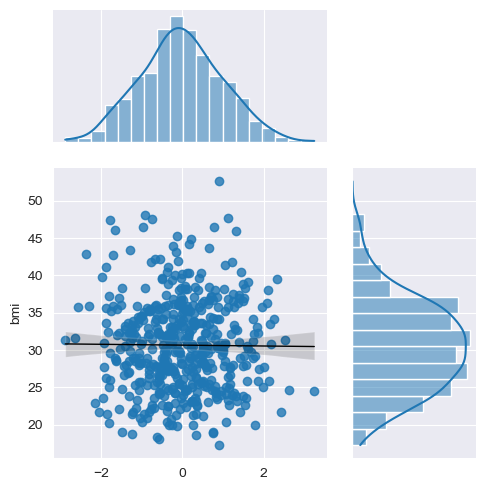

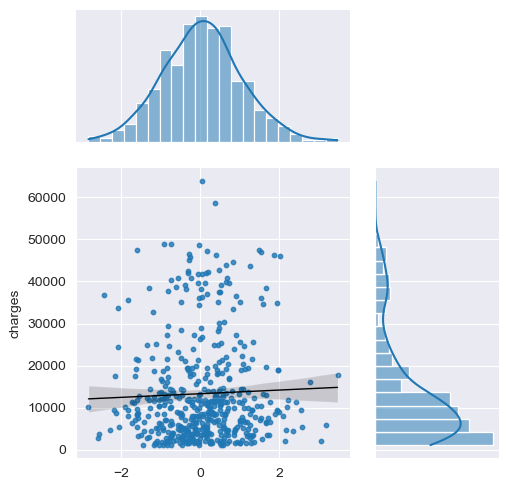

In [14]:
#Q-Q plot:
f_1 = sns.jointplot(x=np.random.normal(0, 1, 500), y=data['bmi'].sample(500), 
                    kind='reg', truncate=True, height=5, ratio=2, 
                    scatter_kws={"s": 10,}, line_kws={'lw': 1, 'color': 'black'})
f_2 = sns.jointplot(x=np.random.normal(0, 1, 500), y=data['charges'].sample(500), 
                    kind='reg', truncate=True, height=5, ratio=2, 
                    scatter_kws={"s": 10,}, line_kws={'lw': 1, 'color': 'black'})

**Нулевая гипотеза выполняется, так как:**
- **pvalue для выборки из столбцов bmi и charges больше 0.05, а это означает то, что данные подчиняются нормальному распределению**
- **Меры центральной тенденции (медиана, мода, среднее) в обоих генеральных совокупностях не имеют одного значения,  это одно доказательство не подчинения нормальному распределению**
- **На графиках, построенных при помощи Q-Q plot видно, что данные имеют нормального распределения**

### 9. Загрузить данные из файла “ECDCCases.csv”.

In [15]:
data_cases = pd.read_csv("C:\\Users\\grman\\Documents\\BigPapa\\Greg\\BigData\\DataSet\\pr3\\ECDCCases.csv")

### 10. Проверить в данных наличие пропущенных значений. 
### Вывести количество пропущенных значений в процентах. 
### Удалить два признака, в которых больше всех пропущенных значений. 
### Для оставшихся признаков обработать пропуски: для категориального признака использовать заполнение значением по умолчанию (например, «other»), для числового признака использовать заполнение медианным значением. 
### Показать, что пропусков больше в данных нет.

In [16]:
data_cases.isna().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [17]:
print('Количество пропущенных значений в процентах:')
d = dict()
for i in data_cases.columns:
    d[i] = str(round(data_cases[i].isna().sum()/len(data_cases[i]), 5))+'%'
d = pd.Series(d)
print(d)

Количество пропущенных значений в процентах:
dateRep                                                           0.0%
day                                                               0.0%
month                                                             0.0%
year                                                              0.0%
cases                                                             0.0%
deaths                                                            0.0%
countriesAndTerritories                                           0.0%
geoId                                                         0.00444%
countryterritoryCode                                          0.00199%
popData2019                                                   0.00199%
continentExp                                                      0.0%
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    0.04651%
dtype: object


In [18]:
data_cases.drop(['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'geoId'], axis=1, inplace=True)

In [19]:
data_cases['countryterritoryCode'].fillna('other', inplace=True) #заполнение категориального признака
data_cases['popData2019'].fillna(data_cases['popData2019'].median(), inplace=True) #заполнение числового признака

In [20]:
data_cases.isna().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
countryterritoryCode       0
popData2019                0
continentExp               0
dtype: int64

### 11. Посмотреть статистику по данным, используя describe(). Сделать выводы о том, какие признаки содержат выбросы. Посмотреть, для каких стран количество смертей в день превысило 3000 и сколько таких дней было.

In [21]:
data_cases.describe()

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.190400e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.091909e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.529798e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


**Признаки, содержащие выбросы:**
- **cases - минимальное значение в этом столбце отрицательное, хотя случаев заболевания не должно быть отрицательное количество**
- **deaths - минимальное значение в этом столбце тоже отрицательное, хотя смертей не может быть отрицательное количество**

In [22]:
filtered_data_cases = data_cases.loc[data_cases['deaths'] > 3000] #фильтруем датафрейм: берем только те строки, у которых в колонке 'deaths' значение больше 3000
print(f'Страны, у которых количество смертей в день превысило 3000 и какое количество дней так было: \n{filtered_data_cases.countriesAndTerritories.value_counts()}')

Страны, у которых количество смертей в день превысило 3000 и какое количество дней так было: 
United_States_of_America    6
Peru                        2
Argentina                   1
Ecuador                     1
Mexico                      1
Name: countriesAndTerritories, dtype: int64


### 12. Найти дублирование данных. Удалить дубликаты.

In [23]:
data_cases.duplicated()

0        False
1        False
2        False
3         True
4        False
         ...  
61899    False
61900    False
61901    False
61902    False
61903    False
Length: 61904, dtype: bool

**Дубликаты действительно есть, удалим их:**

In [24]:
data_cases.drop_duplicates(inplace=True)

### 13. Загрузить данные из файла “bmi.csv”. 
### Взять оттуда две выборки. Одна выборка – это индекс массы тела людей c региона northwest, вторая выборка – это индекс массы тела людей с региона southwest. 
### Сравнить средние значения этих выборок, используя t-критерий Стьюдента. 
### Предварительно проверить выборки на нормальность (критерий Шопиро-Уилка) и на гомогенность дисперсии (критерий Бартлетта).

In [25]:
data_bmi = pd.read_csv('C:\\Users\\grman\\Documents\\BigPapa\\Greg\\BigData\\DataSet\\pr3\\bmi.csv')

In [26]:
v_north = data_bmi.loc[data_bmi['region'] == 'northwest'].bmi
v_south = data_bmi.loc[data_bmi['region'] == 'southwest'].bmi

#проверка выборок на нормальность (критерий Шопиро-Уилка)
k_shapiro_north = sts.shapiro(v_north)
k_shapiro_south = sts.shapiro(v_south)
print(k_shapiro_north, k_shapiro_south, sep='\n')

ShapiroResult(statistic=0.9954646825790405, pvalue=0.4655335247516632)
ShapiroResult(statistic=0.9949268698692322, pvalue=0.3629520535469055)


**Проверка выборок на нормальность успешная: обе выборки имеют pvalue, большее 0.05, а значит, имеют нормальное распределение**

In [27]:
#проверка выборок на гомогенность дисперсии (критерий Бартлетта)
k_bartlett = sts.bartlett(v_north, v_south)
print(k_bartlett)

BartlettResult(statistic=3.4000745256463825, pvalue=0.06519347353580048)


**pvalue первышает 0.05, следовательно, дисперсии выборок примерно одинаковы**

In [28]:
#проверка выборок на средние значения (t-критерий Стьюдента)
t_k = sts.ttest_ind(v_north, v_south)
print(t_k)

Ttest_indResult(statistic=-3.2844171500398582, pvalue=0.001076958496307695)


**pvalue меньше, чем 0.05, следовательно, средние значения выборок различны и они принадлежат к разным генеральным совокупностям**

### 14. Кубик бросили 600 раз, получили следующие результаты:
### N Количество выпадений
### 1 97
### 2 98
### 3 109
### 4 95
### 5 97
### 6 104
### С помощью критерия Хи-квадрат проверить, является ли полученное распределение равномерным. Использовать функцию scipy.stats.chisquare().

In [29]:
observed = (97, 98, 109, 95, 97, 104)
expected = (100, 100, 100, 100, 100, 100)
sts.chisquare(observed, expected)

Power_divergenceResult(statistic=1.44, pvalue=0.9198882077437889)

**При проверке критерием Хи-квадрат pvalue больше, чем 0.05, поэтому можно сделать вывод, что распределение является равномерным**

### 15. С помощью критерия Хи-квадрат проверить, являются ли переменные зависимыми. 
### Создать датафрейм, используя следующий код:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1], 'Гражданский брак': [80,22,20,35,6,4], 'Не состоит в отношениях': [35,44,35,6,8,22]})

data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']
### Использовать функцию scipy.stats.chi2_contingency(). Влияет ли семейное положение на занятость?

In [30]:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
                    'Гражданский брак': [80,22,20,35,6,4],
                    'Не состоит в отношениях': [35,44,35,6,8,22]})

data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']
sts.chi2_contingency(data)

Chi2ContingencyResult(statistic=122.29654948595365, pvalue=1.7291616900960234e-21, dof=10, expected_freq=array([[74.664, 68.136, 61.2  ],
       [30.378, 27.722, 24.9  ],
       [24.156, 22.044, 19.8  ],
       [30.744, 28.056, 25.2  ],
       [13.176, 12.024, 10.8  ],
       [ 9.882,  9.018,  8.1  ]]))

**Используя критерий Хи-квадрат (сhi2) и таблицу сопряженности (contingency) удалось проверить, что переменные являются зависимыми (pvalue значительно больше 0.05). Семейное положение влияет на занятость**